In [15]:
#Import libraries
#Pandas is used for data analysis, loading of data in csv, data manipulation and data preprocessing
#Numpy is a general purpose array-processing package that is used for numerical analysis
#Matplotlib is plots and charts
#Seaborn is based of matplotlib and it a visualization libraray that is also used for charts and plots
#sklearn proviide supervised and supervised machine learnin algorithms and also provide classification, regression etc

# 1. Import the required libraries

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()



from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#  2. Load the diabetes data

In [212]:
df = pd.read_csv('diabetes.csv')

# 3. Exploratory data analysis (EDA)

In [17]:
# We do EDA to get more insights from the data such head, shape, and general summary of the data
# We also do data cleaning to check for DUPLICATE and NULL values

In [213]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [214]:
df.sample(12)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
692,2,121,70,32,95,39.1,0.886,23,0
166,3,148,66,25,0,32.5,0.256,22,0
727,0,141,84,26,0,32.4,0.433,22,0
713,0,134,58,20,291,26.4,0.352,21,0
168,4,110,66,0,0,31.9,0.471,29,0
388,5,144,82,26,285,32.0,0.452,58,1
177,0,129,110,46,130,67.1,0.319,26,1
452,0,91,68,32,210,39.9,0.381,25,0
619,0,119,0,0,0,32.4,0.141,24,1
543,4,84,90,23,56,39.5,0.159,25,0


In [215]:
#To check the number of rows and columns respectively
df.shape 

(768, 9)

In [27]:
#checking for details of he data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [216]:
# Checking the statistical summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 4. Data Preprocessing

In [29]:
#The minimum values in these variables: pregnancies, glucose, blood pressure, skinthickness, insulin and BMI is zero
#It is not possible to have 0 values for these variables so it means there are null values in the data
# We put the mean of their respective columns to fill in the zeros

In [30]:
# Check for duplicates in the data

In [217]:
#Check for shape first to find the nmber of rows and columns
df.shape

(768, 9)

In [218]:
#Check for duplicates
df = df.drop_duplicates()

In [219]:
#We check for shape again to verify any drop of duplicates
df.shape

(768, 9)

In [220]:
#check whether it has null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
#cCheck the number of zeros in the data but we first have to check the columns we have in the dataset

In [221]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [39]:
#Check the number of zeros

In [222]:
print('No. of zero values in Pregnancies',df[df['Pregnancies']==0].shape[0])

No. of zero values in Pregnancies 111


In [223]:
print('No. of zero values in Glucose',df[df['Glucose']==0].shape[0])

No. of zero values in Glucose 5


In [224]:
print('No. of zero values in BloodPressure',df[df['BloodPressure']==0].shape[0])

No. of zero values in BloodPressure 35


In [225]:
print('No. of zero values in SkinThickness',df[df['SkinThickness']==0].shape[0])

No. of zero values in SkinThickness 227


In [226]:
print('No. of zero values in Insulin',df[df['Insulin']==0].shape[0])

No. of zero values in Insulin 374


In [227]:
print('No. of zero values in BMI',df[df['BMI']==0].shape[0])

No. of zero values in BMI 11


In [47]:
#Replace zero values with the mean of the respective columns

In [228]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
print('No. of zero values in Glucose',df[df['Glucose']==0].shape[0])

No. of zero values in Glucose 0


In [229]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
print('No. of zero values in BloodPressure',df[df['BloodPressure']==0].shape[0])

No. of zero values in BloodPressure 0


In [230]:
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
print('No. of zero values in SkinThickness',df[df['SkinThickness']==0].shape[0])

No. of zero values in SkinThickness 0


In [231]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
print('No. of zero values in Insulin',df[df['Insulin']==0].shape[0])

No. of zero values in Insulin 0


In [232]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
print('No. of zero values in BMI',df[df['BMI']==0].shape[0])

No. of zero values in BMI 0


In [233]:
#To check whether the zero values have been filled
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
#Visualization

Negative (0): 500
Positive (1): 268


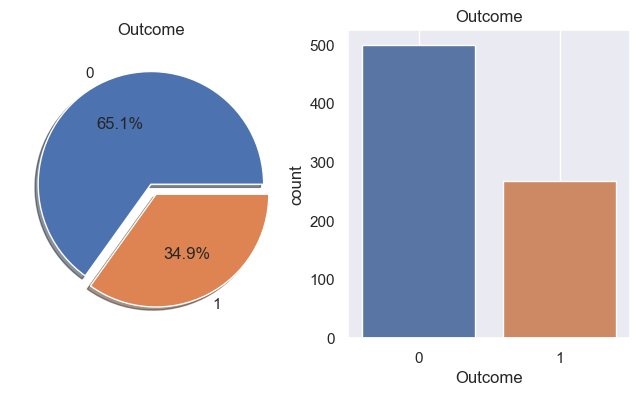

In [234]:
f, ax = plt.subplots(1,2, figsize = (8,4))
df['Outcome'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome',data = df, ax = ax[1])
ax[1].set_title('Outcome')
N,P = df['Outcome'].value_counts()
print('Negative (0):', N)
print('Positive (1):', P)
plt.grid()
plt.show()

In [68]:
#An outcome of 0 represents people with without diabetes(Negative) and an outcome of 1 represents those with diabetes(Positive)
#The pie chart shows the percentage of Diabetic-positive and diabetic-negative patients in the data
#The bar chart shows the number of diabetic and non-diabetic patients in the data
#We can derive insight that the data is imbalanced because the number of people without diabetes are more than those who have.

In [69]:
#We check the distribution of the dataset whether it is normal or skewed to the left or right

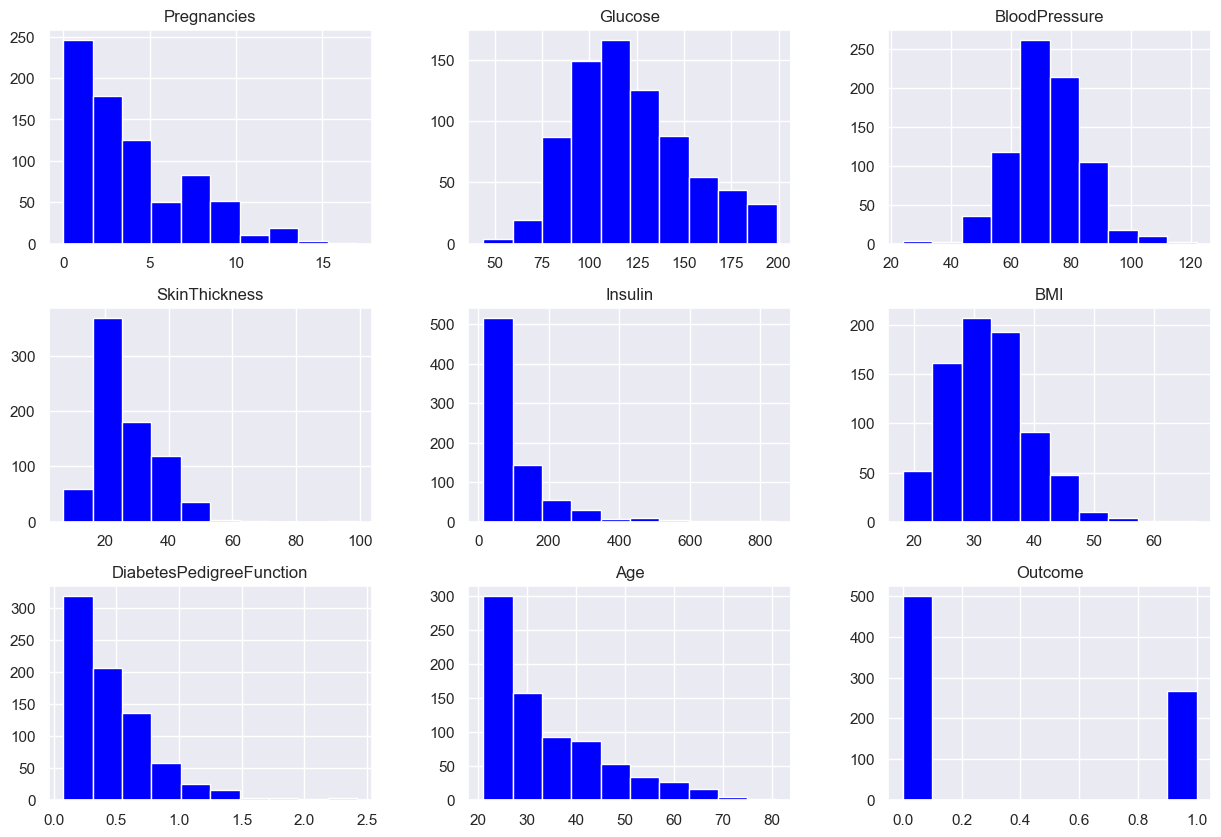

In [235]:
v = df.hist(bins = 10, figsize = (15,10), color = 'blue')

In [81]:
#We create a scatterplot the visualise in order to understand the realationship between the variables

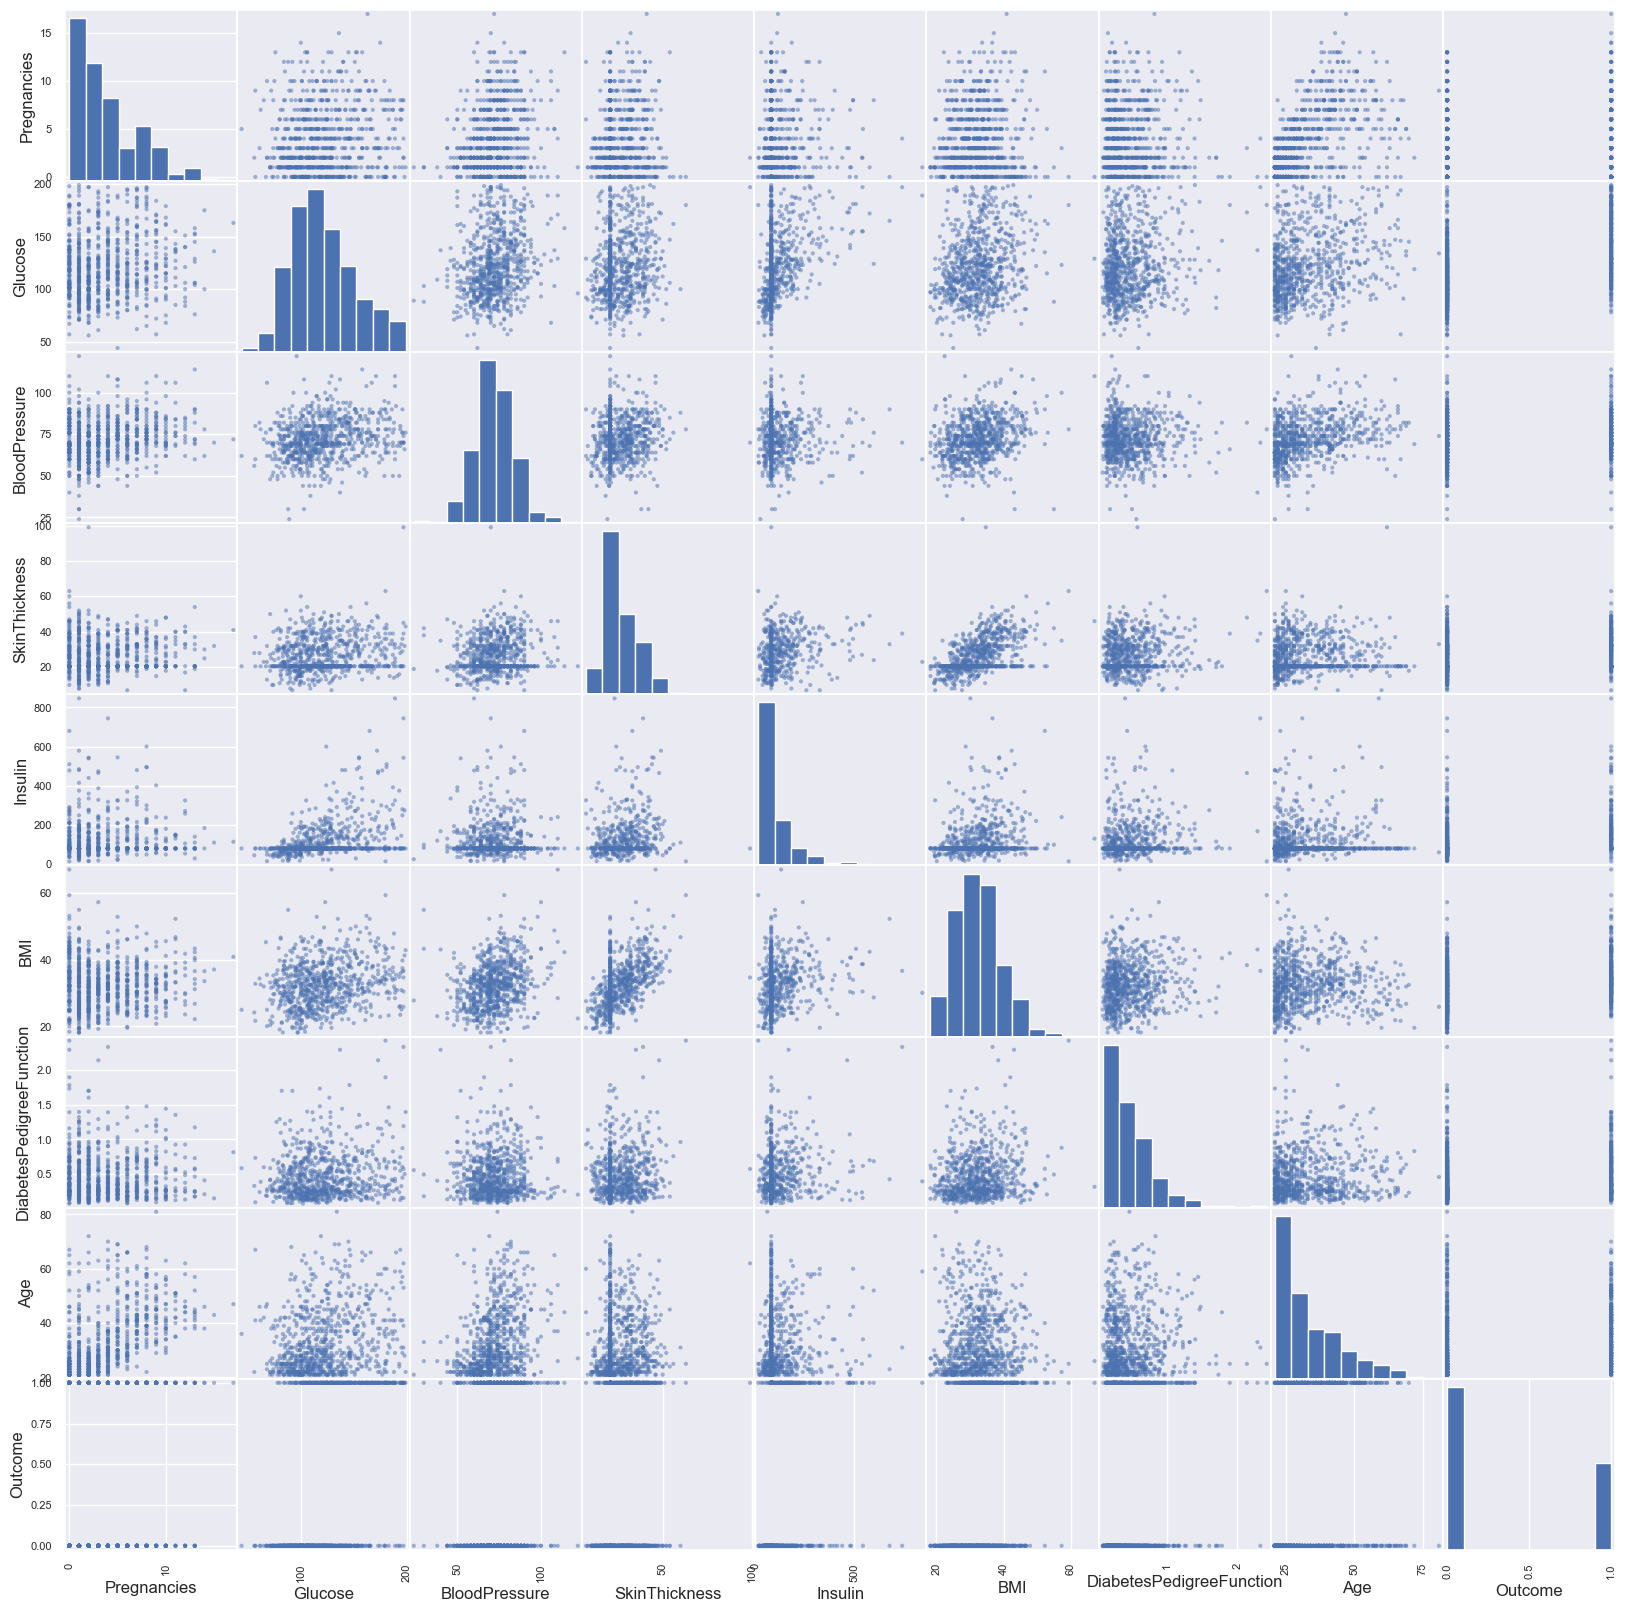

In [236]:
scatter_matrix(df, figsize = (20, 20));

In [77]:
#Correlation Analysis
#This helps to know the linear relationship between and helps us to know how much dependency there is between two variables
#The variables: The feature variable and the target variable.

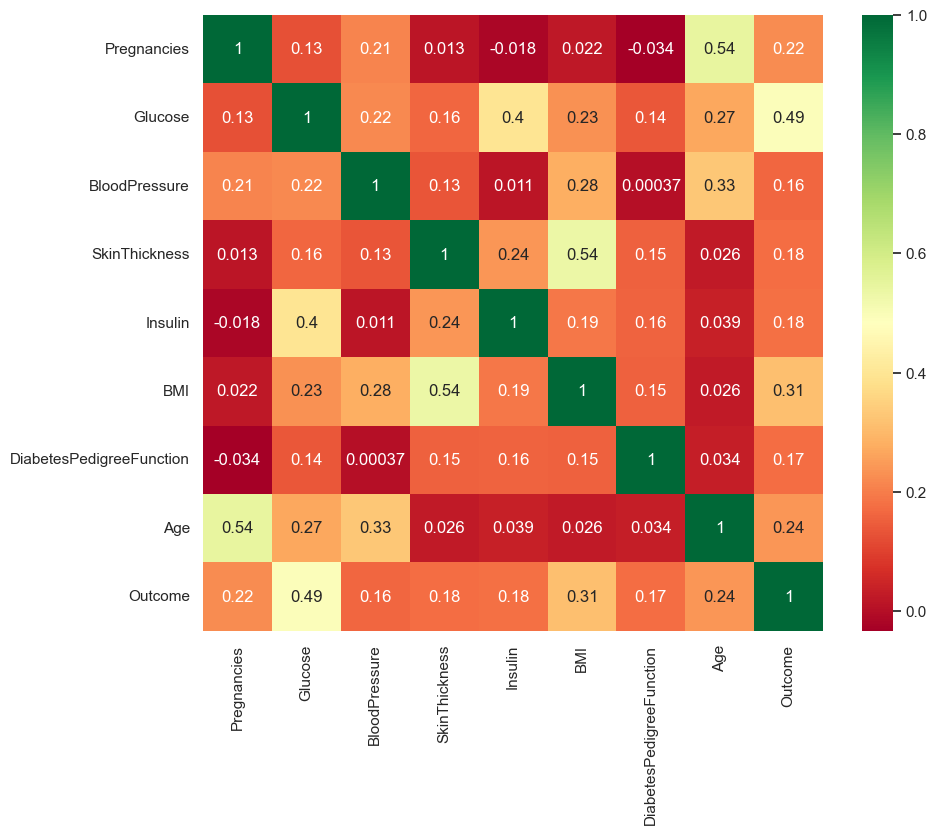

In [237]:
plt.figure(figsize=(10,8))

v = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [85]:
#We can tell from the heatmap that there is a high correlation between coutcome and (Pregnancies, Glucose, BMI and Age)

# 5. Spliiting the data

In [87]:
#We split the data into X and y

In [238]:
target_name = 'Outcome'

# Separate object for target feature
y = df[target_name]

# Separate object for Input Features
X = df.drop(target_name, axis =1)

In [239]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [240]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# 6. FEATURE SCALING

In [92]:
# We scale the data to as this technique brings data points that are far from each other closer in order 
# This increases the algorithm effectiveness and speed up the machine learning processing.

In [241]:
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

In [98]:
print(SSX)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


# 7. TRAIN TEST SPLIT

In [96]:
#We split the data into training and testing using train_test_split module from Sci-kit learn library

In [242]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size = 0.2, random_state = 7)
                                                                               

In [243]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# 8. MODEL BUILDING/ CLASSIFICATION ALGORITHMS

# 8.1 Decision Trees

In [105]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [244]:
#Making prediction
dtree_pred = dtree.predict(X_test)
dtree_pred.shape

(154,)

# 8.2 Random Forest

In [245]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [246]:
#Making prediction
rfc_pred = rfc.predict(X_test)
rfc_pred.shape

(154,)

# 8.3 Support Vector Machine

In [247]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [248]:
#Making prediction
svc_model_pred = svc_model.predict(X_test)
svc_model_pred.shape

(154,)

# 8.4 K Nearest Neighbor

In [249]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [250]:
#Making prediction
knn_pred = knn.predict(X_test)
knn_pred.shape

(154,)

# 8.5 Logistic Regression

In [251]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
lr_model.fit(X_train,y_train)


LogisticRegression(multi_class='ovr', solver='liblinear')

In [252]:
#Making prediction 
lr_pred = lr_model.predict(X_test)
lr_pred.shape

(154,)

# 9. MODEL EVALUATION

In [ ]:
#Train score and Test score

In [ ]:
#Decision Tree

In [253]:
from sklearn.metrics import accuracy_score

print("Train Accuracy of Decision Tree", dtree.score(X_train, y_train)*100 )
print("Accuracy (Test) score of Decision Tree", dtree.score(X_test, y_test)*100 )
print("Accuracy score of Decision Tree", accuracy_score(y_test, dtree_pred)*100 )

Train Accuracy of Decision Tree 100.0
Accuracy (Test) score of Decision Tree 79.87012987012987
Accuracy score of Decision Tree 79.87012987012987


In [121]:
#Random Forest

In [254]:
print("Train Accuracy of Random Forest", rfc.score(X_train, y_train)*100 )
print("Accuracy (Test) score of Random Forest", rfc.score(X_test, y_test)*100 )
print("Accuracy score of Random Forest", accuracy_score(y_test, rfc_pred)*100 )

Train Accuracy of Random Forest 100.0
Accuracy (Test) score of Random Forest 81.81818181818183
Accuracy score of Random Forest 81.81818181818183


In [123]:
#Support Vector Machine

In [255]:
print("Train Accuracy of SVM", svc_model.score(X_train, y_train)*100 )
print("Accuracy (Test) score of SVM", svc_model.score(X_test, y_test)*100 )
print("Accuracy score of Random SVM", accuracy_score(y_test, svc_model_pred)*100 )

Train Accuracy of SVM 81.92182410423453
Accuracy (Test) score of SVM 83.11688311688312
Accuracy score of Random SVM 83.11688311688312


In [126]:
#K Nearest Neighbour

In [256]:
print("Train Accuracy of KNN", knn.score(X_train, y_train)*100 )
print("Accuracy (Test) score of KNN", knn.score(X_test, y_test)*100 )
print("Accuracy score of Random KNN", accuracy_score(y_test, knn_pred)*100 )

Train Accuracy of KNN 81.10749185667753
Accuracy (Test) score of KNN 74.67532467532467
Accuracy score of Random KNN 74.67532467532467


In [128]:
#Logistic Regression

In [292]:
print("Train Accuracy of Logistic Regression", lr_model.score(X_train, y_train)*100 )
print("Accuracy (Test) score of Logistic Regression", lr_model.score(X_test, y_test)*100 )
print("Accuracy score of Logistic Regression", accuracy_score(y_test, lr_pred)*100 )

Train Accuracy of Logistic Regression 77.36156351791531
Accuracy (Test) score of Logistic Regression 77.27272727272727
Accuracy score of Logistic Regression 77.27272727272727


# 10. CONFUSION MATRIX

In [ ]:
#Decision tree

In [258]:
predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7987012987012987


In [259]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[81 16]
 [15 42]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        97
           1       0.72      0.74      0.73        57

    accuracy                           0.80       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.80      0.80      0.80       154



<AxesSubplot:>

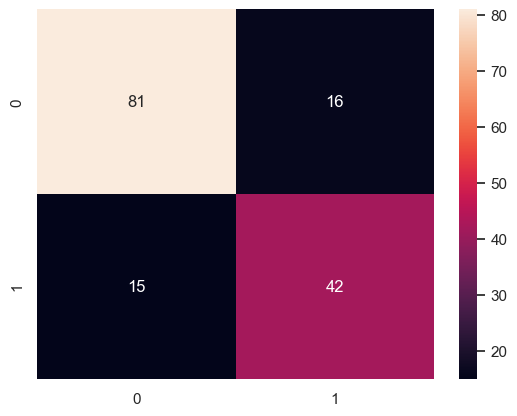

In [275]:
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot = True, fmt = "d")

In [136]:
#Random Forest

In [261]:
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.8181818181818182


In [262]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[85 12]
 [16 41]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        97
           1       0.77      0.72      0.75        57

    accuracy                           0.82       154
   macro avg       0.81      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



<AxesSubplot:>

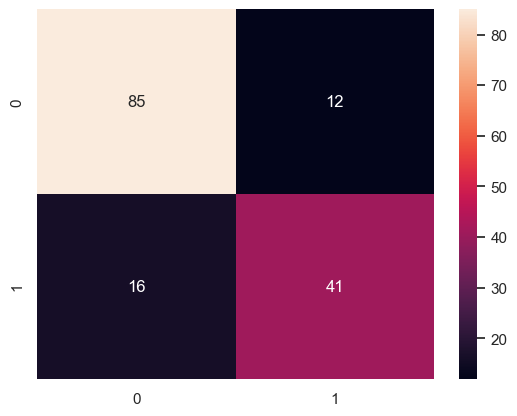

In [274]:
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot = True, fmt = "d")

In [139]:
#SVM

In [271]:
svc_pred = svc_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.8311688311688312


In [272]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[91  6]
 [20 37]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        97
           1       0.86      0.65      0.74        57

    accuracy                           0.83       154
   macro avg       0.84      0.79      0.81       154
weighted avg       0.83      0.83      0.83       154



<AxesSubplot:>

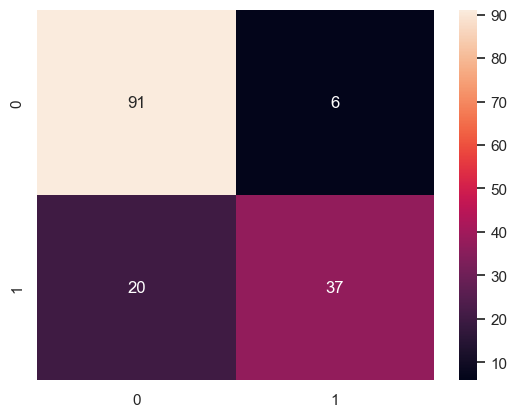

In [273]:
sns.heatmap(confusion_matrix(y_test, svc_pred), annot = True, fmt = "d")

In [143]:
#K Nearest Neighbour

In [276]:
kn_pred = knn.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, kn_pred)))

Accuracy Score = 0.7467532467532467


In [277]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, kn_pred))
print(classification_report(y_test, kn_pred))

[[82 15]
 [24 33]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        97
           1       0.69      0.58      0.63        57

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



<AxesSubplot:>

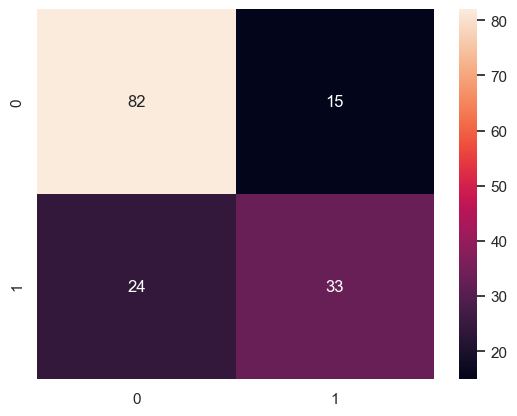

In [191]:
sns.heatmap(confusion_matrix(y_test, knn_pred), annot = True, fmt = "d")

In [147]:
#Logistic Regression

In [293]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        97
           1       0.77      0.72      0.75        57

    accuracy                           0.82       154
   macro avg       0.81      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



# 10. ROC CURVE/ AUC

In [156]:
#Decision Tree

In [278]:
# Area Under Curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, dtree_pred)
print("ROC AUC of Decision Tree is", auc)

ROC AUC of Decision Tree is 0.7859468258274552


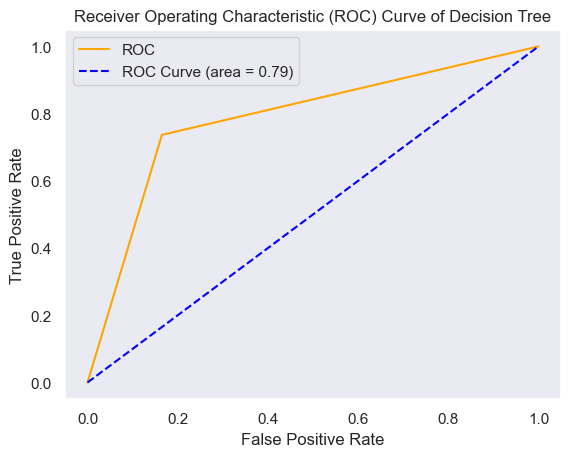

In [155]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, dtree_pred)
plt.plot(fpr, tpr, color = 'orange', label='ROC')
plt.plot([0, 1], [0, 1], color = 'blue', linestyle='--', label = 'ROC Curve (area = %0.2f)' % auc )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve of Decision Tree")
plt.legend()
plt.grid()
plt.show()

In [157]:
#Random Forest

In [280]:
# Area Under Curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, rfc_pred)
print("ROC AUC of Random Forest is", auc)

ROC AUC of Random Forest is 0.7977934527039248


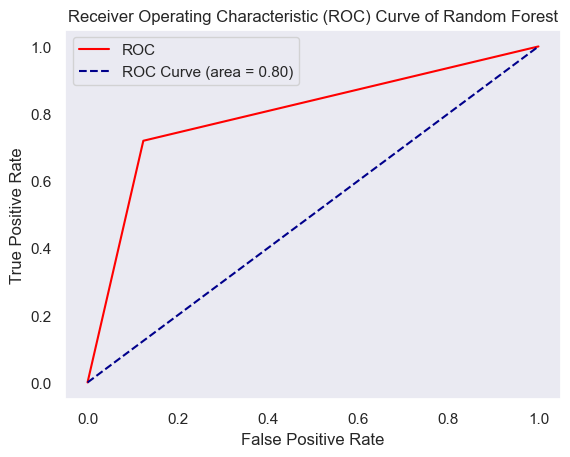

In [281]:
fpr, tpr, thresholds = roc_curve(y_test, rfc_pred)
plt.plot(fpr, tpr, color = 'red', label='ROC')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle='--', label = 'ROC Curve (area = %0.2f)' % auc )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve of Random Forest")
plt.legend()
plt.grid()
plt.show()

In [160]:
#SVM

In [284]:
# Area Under Curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, svc_model_pred)
print("ROC AUC of SVM is", auc)

ROC AUC of SVM is 0.7936335684572255


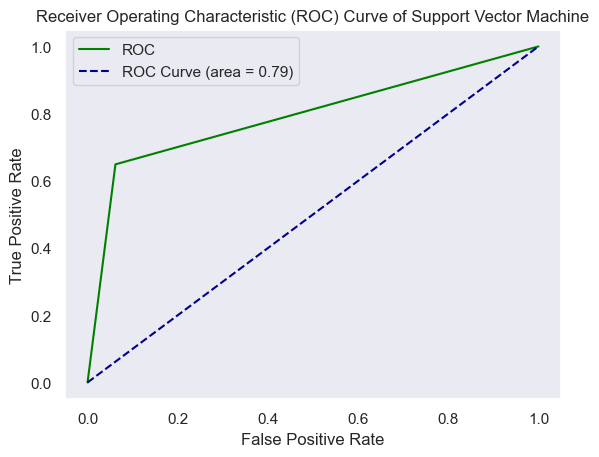

In [285]:
fpr, tpr, thresholds = roc_curve(y_test, svc_model_pred)
plt.plot(fpr, tpr, color = 'green', label='ROC')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle='--', label = 'ROC Curve (area = %0.2f)' % auc )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve of Support Vector Machine")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#KNN

In [286]:
# Area Under Curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, knn_pred)
print("ROC AUC of KNN is", auc)

ROC AUC of KNN is 0.7121540965816603


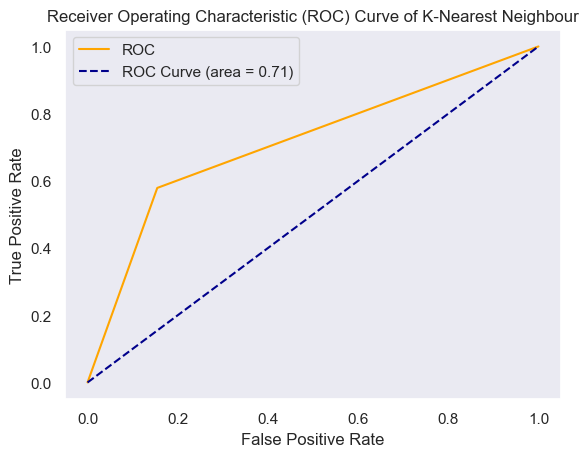

In [287]:
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
plt.plot(fpr, tpr, color = 'orange', label='ROC')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle='--', label = 'ROC Curve (area = %0.2f)' % auc )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve of K-Nearest Neighbour")
plt.legend()
plt.grid()
plt.show()

In [166]:
#LOGISTIC REGRESSION

In [294]:
# Area Under Curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, lr_pred)
print("ROC AUC of Logistic Regression is", auc)

ROC AUC of Logistic Regression is 0.7327726532826913


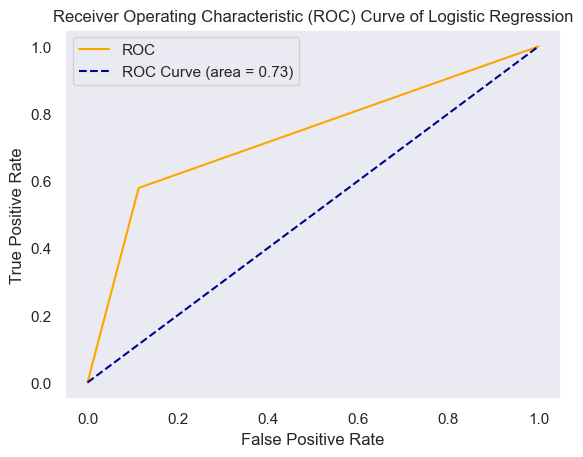

In [295]:
fpr, tpr, thresholds = roc_curve(y_test, lr_pred)
plt.plot(fpr, tpr, color = 'orange', label='ROC')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle='--', label = 'ROC Curve (area = %0.2f)' % auc )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve of Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 11. FEATURE IMPORTANCE

In [288]:
rfc.feature_importances_

array([0.08188182, 0.22787307, 0.09521962, 0.07353223, 0.08257859,
       0.18042096, 0.1327252 , 0.12576851])

<AxesSubplot:>

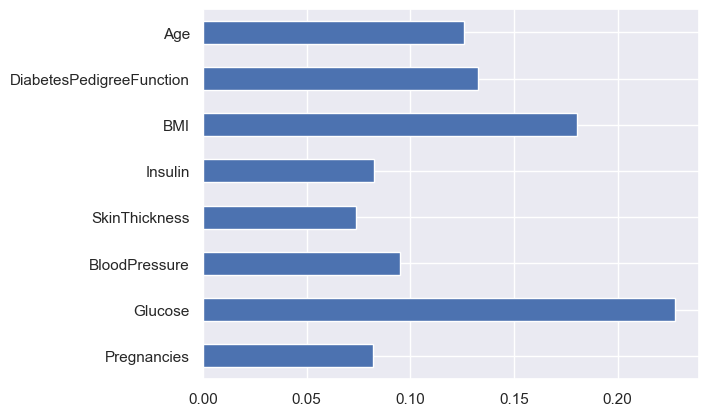

In [291]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

In [1]:
#From this we can tell glucose is the most important factor in predicting diabetes